## Import and visualization 

In [0]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
import os
cwd = os.getcwd()
cwd

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab_Notebooks/rana/YE358311_Fender_apron.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
defect = cv2.imread('/tmp/YE358311_Fender_apron/test/defect_test/IMG20180905150731.jpg')
defect = cv2.cvtColor(defect,cv2.COLOR_BGR2RGB)

In [7]:
type(defect)

numpy.ndarray

In [8]:
defect.shape

(3120, 4160, 3)

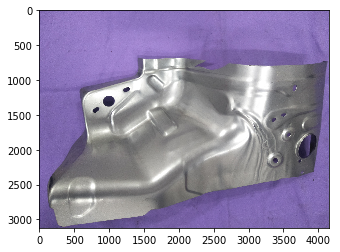

In [9]:
plt.imshow(defect)

In [0]:
healthy = cv2.imread('../tmp/YE358311_Fender_apron/test/healthy_test/IMG20180905152540.jpg')
healthy = cv2.cvtColor(healthy,cv2.COLOR_BGR2RGB)

In [12]:
type(healthy)

numpy.ndarray

In [13]:
healthy.shape

(3120, 4160, 3)

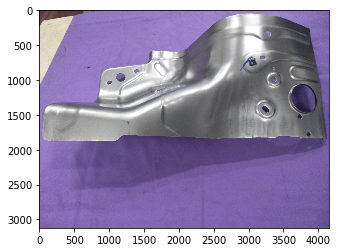

In [14]:
plt.imshow(healthy)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [15]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

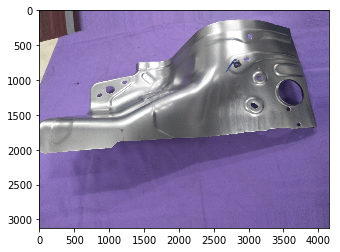

In [17]:
plt.imshow(image_gen.random_transform(healthy))

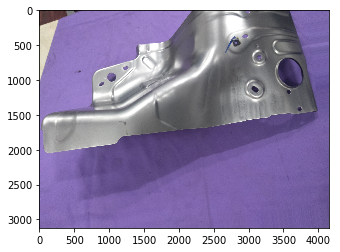

In [18]:
plt.imshow(image_gen.random_transform(healthy))

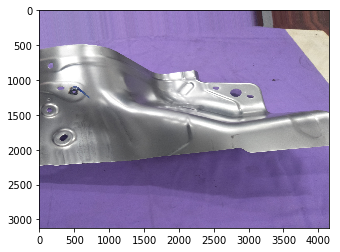

In [19]:
plt.imshow(image_gen.random_transform(healthy))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [20]:
image_gen.flow_from_directory('../tmp/YE358311_Fender_apron/train')

Found 180 images belonging to 2 classes.


In [21]:
image_gen.flow_from_directory('../tmp/YE358311_Fender_apron/test')

Found 70 images belonging to 2 classes.


### Ploting

In [0]:
# this function is used draw Categorical Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('binary_crossentropy Loss')
  plt.title('\nbinary_crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

### Resizing Images



In [0]:
# width,height,channels
image_shape = (3120, 4160, 3)

# Creating the Model

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
batch_size = 1
num_classes = 2
epochs = 30

In [26]:
model1 = Sequential()

#first layer
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu',strides=(2,2),input_shape=image_shape))

#second layer
model1.add(Conv2D(32, (3,3), strides=(2,2),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Adding third conv layer
model1.add(Conv2D(64, (3,3), strides=(2,2),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

#flattening
model1.add(Flatten())

# Adding first hidden layer
model1.add(Dense(32, activation='relu',kernel_initializer=he_normal(seed=None)))
model1.add(Dropout(0.25))

#output layer
model1.add(Dense(num_classes, activation='sigmoid'))

#compiling the model
model1.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1559, 2079, 32)    896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 779, 1039, 32)     9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 389, 519, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 389, 519, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 194, 259, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 129, 64)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 129, 64)      

### Training the Model

In [28]:
#batch_size = 64

train_image_gen = image_gen.flow_from_directory('../tmp/YE358311_Fender_apron/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size)
                                               #class_mode='binary')

Found 180 images belonging to 2 classes.


In [29]:
test_image_gen = image_gen.flow_from_directory('../tmp/YE358311_Fender_apron/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size)
                                               #class_mode='binary')

Found 70 images belonging to 2 classes.


In [30]:
train_image_gen.class_indices

{'defect_train': 0, 'healthy_train': 1}

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
results = model1.fit_generator(train_image_gen,epochs=epochs,
                              steps_per_epoch=50,
                              validation_data=test_image_gen,
                              validation_steps=12)




Epoch 1/30





50/50 [==============================] - 217s 4s/step - loss: 8.2192 - acc: 0.4700 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 203s 4s/step - loss: 2.0990 - acc: 0.5700 - val_loss: 0.5917 - val_acc: 0.7500
Epoch 3/30
50/50 [==============================] - 199s 4s/step - loss: 0.7074 - acc: 0.5400 - val_loss: 0.6972 - val_acc: 0.4167
Epoch 4/30
50/50 [==============================] - 201s 4s/step - loss: 0.6953 - acc: 0.5400 - val_loss: 0.6932 - val_acc: 0.4167
Epoch 5/30
50/50 [==============================] - 202s 4s/step - loss: 0.6936 - acc: 0.4300 - val_loss: 0.6939 - val_acc: 0.4167
Epoch 6/30
50/50 [==============================] - 202s 4s/step - loss: 0.6915 - acc: 0.6400 - val_loss: 0.6951 - val_acc: 0.4167
Epoch 7/30
50/50 [==============================] - 197s 4s/step - loss: 0.6913 - acc: 0.5800 - val_loss: 0.6978 - val_acc: 0.3333
Epoch 8/30
50/50 [==============================] - 202s 4s/step - loss: 0.

In [0]:
model1.save('model1.h5')

# Evaluating the Model

In [34]:
results.history['acc']

[0.47,
 0.57,
 0.54,
 0.54,
 0.43,
 0.64,
 0.58,
 0.64,
 0.42,
 0.62,
 0.64,
 0.54,
 0.62,
 0.6,
 0.56,
 0.48,
 0.58,
 0.66,
 0.6,
 0.4,
 0.64,
 0.72,
 0.48,
 0.48,
 0.66,
 0.62,
 0.44,
 0.64,
 0.76,
 0.58]

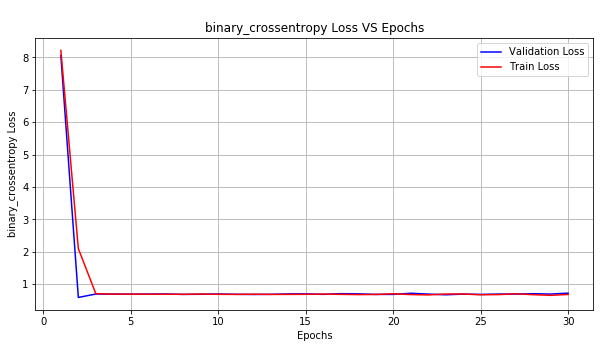

In [35]:
'''# Evaluating the model
score = model1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model1_test = score[1]
model1_train = max(history1.history['acc'])'''

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = results.history['val_loss']
# Training loss
ty = results.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

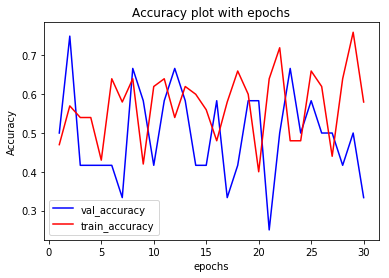

In [46]:
plt.plot(x,vy,'-b',label='val_accuracy')
plt.plot(x,ty,'-r',label='train_accuracy')
plt.legend(loc='lower left')
plt.title('Accuracy plot with epochs')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show();

In [0]:
# model.save('cat_dog_100epochs.h5')

In [38]:
model1.metrics_names

['loss', 'acc']

# Predicting on new images

In [47]:
train_image_gen.class_indices

{'defect_train': 0, 'healthy_train': 1}

In [0]:
import numpy as np
from keras.preprocessing import image

file = '../tmp/YE358311_Fender_apron/train/defect_train/IMG20180905144932.jpg'

img = image.load_img(file, target_size=(3120, 4160, 3))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [0]:
prediction_prob = model1.predict(img)

In [55]:
train_image_gen.class_indices

{'defect_train': 0, 'healthy_train': 1}

In [67]:
# Output prediction
print(f'Probability that image is a healthy is: {prediction_prob} ')

Probability that image is a healthy is: [[0.45860156 0.5421296 ]] 


In [68]:
from sklearn.metrics import classification_report
predictions = model1.predict_classes(img)
predictions

array([1])